# **Hands On Machine Learning**

<img src='https://m.media-amazon.com/images/I/71UF9mDAX3L._AC_UF1000,1000_QL80_.jpg' width=20%><br>
<p>Ensembles</p>

### **Voting Classifier**

Simple set of classifiers voting for result prediction.<br>
There are 2 types:
- Hard Voting Classifiers
- Soft Voting Classifiers

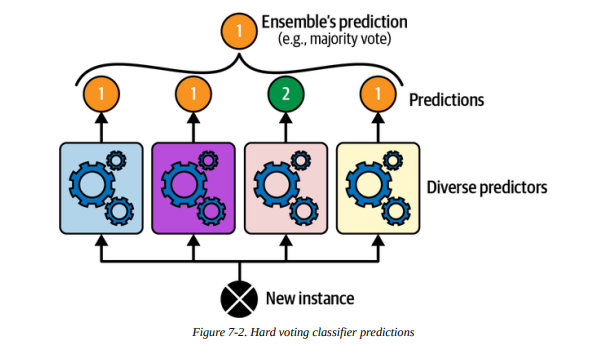

In [96]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [97]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=17)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=17)

In [99]:
X.shape

(500, 2)

In [100]:
import seaborn as sns

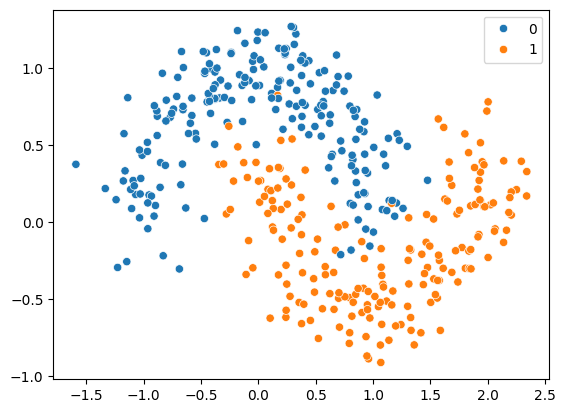

In [101]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train);

In [102]:
voting_clf = VotingClassifier(
    estimators=[
        ('logi', LogisticRegression(random_state=17)),
        ('rand_for', RandomForestClassifier(random_state=17)),
        ('svc', SVC(random_state=17))
    ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logi', LogisticRegression(random_state=17)),
                             ('rand_for',
                              RandomForestClassifier(random_state=17)),
                             ('svc', SVC(random_state=17))])

In [103]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

logi = 0.84
rand_for = 0.95
svc = 0.94


In [104]:
print(voting_clf.predict(X_test[:1]), y_test[0])

[1] 1


Let's see how our voting went

In [105]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([1])]

In [106]:
voting_clf.score(X_test, y_test)

0.95

<img src='https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-07-at-4.40.58-PM-1.png' width=30%><br>
Soft voting

In [107]:
voting_clf.voting = "soft"

# configure svc to predict proba
voting_clf.named_estimators['svc'].probability = True

In [108]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logi', LogisticRegression(random_state=17)),
                             ('rand_for',
                              RandomForestClassifier(random_state=17)),
                             ('svc', SVC(probability=True, random_state=17))],
                 voting='soft')

In [109]:
for name, clf in voting_clf.named_estimators_.items():
  print(f"{name}, {clf.score(X_test, y_test)}")

logi, 0.84
rand_for, 0.95
svc, 0.94


In [110]:
voting_clf.score(X_test, y_test)

0.94

In general Soft Voting performs better, but not in our case